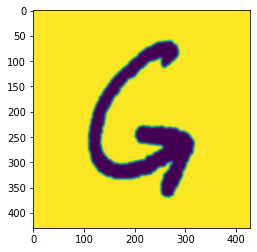

In [2]:
import mahotas
import scipy.io
import skimage.io
import matplotlib.pyplot as plt
image = skimage.io.imread("test.jpg")
plt.imshow(image)

In [3]:

moments = mahotas.features.zernike_moments(image, 21, degree=8)
print(moments)

[0.31830989 0.02842042 0.02678415 0.0345862  0.02398946 0.03162968
 0.0082653  0.01623806 0.02860827 0.00301335 0.00405256 0.01979818
 0.01004851 0.00371142 0.00263745 0.0158083  0.00512718 0.00900778
 0.00878119 0.00772429 0.01190808 0.00572046 0.00531117 0.00350372
 0.00273018]


3 (430, 429, 3)


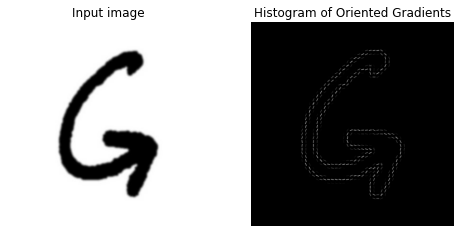

In [4]:
import skimage.feature
from skimage import data, exposure, color

image = color.gray2rgb(image)
print(image.ndim,image.shape)
fd, hog_image = skimage.feature.hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [5]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
dataset = torchvision.datasets.ImageFolder("./data/classified/",transform=transform)
loader = DataLoader(dataset,batch_size=1,shuffle=True)

In [6]:
# for x,y in loader:
#     print(x.shape)
#     print(y.shape)

(430, 429)
(48, 2)


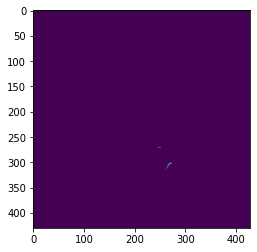

In [11]:
import numpy as np
image = skimage.io.imread("test.jpg")
print(image.shape)
pattern_size = 13
result_img = skimage.feature.corner_fast(image, n=pattern_size, threshold=0.01)
locs = skimage.feature.corner_peaks(result_img, min_distance=1)
plt.imshow(result_img)
print(locs.shape)
ind = np.lexsort((locs[:,1],locs[:,0])) 
locs = locs[ind]
# print(locs)

6 7
(430, 429)
6 7
6 7
6 7
6 7
6 7
6 7
6 7
6 7
(13, 13, 8)


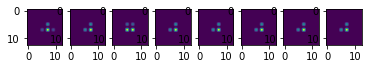

In [12]:
import cv2
fig, ax = plt.subplots(1, 8)
m = pattern_size//2
n = pattern_size - m
print(m,n)
print(result_img.shape)
H,W = result_img.shape
filter_responses = None
for i in range(8):
    try:
        n = np.min([H - locs[i,0],W - locs[i,1],n])
        m = pattern_size - n
        print(m,n)
        patch = result_img[locs[i][0]-m:locs[i][0]+n, locs[i][1]-m:locs[i][1]+n]
        fd, hog_pattern = skimage.feature.hog(patch, orientations=8,
                                            pixels_per_cell=(2, 2),
                                            cells_per_block=(1, 1), visualize=True, multichannel=False)
    except:
        hog_pattern = np.zeros((pattern_size, pattern_size))
    ax[i].imshow(hog_pattern)
    try:
        filter_responses = np.dstack((filter_responses, hog_pattern))
    except:
        filter_responses = hog_pattern
print(filter_responses.shape)